In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [5]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [7]:
train_data.nunique(axis=0)

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [8]:
train_data.dropna(axis=0,inplace=True)

In [9]:
train_data = pd.get_dummies(train_data,drop_first=True)

In [10]:
train_data.head()
tr_columns = train_data.columns

<AxesSubplot:xlabel='Fare'>

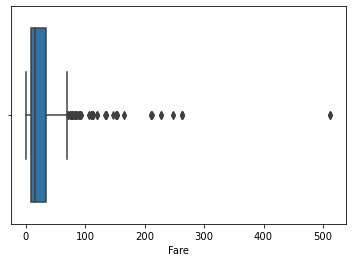

In [11]:
sns.boxplot(x=train_data['Fare'])

In [12]:
scaler = MinMaxScaler()

In [13]:
train_data = scaler.fit_transform(train_data)

In [14]:
new_data = pd.DataFrame(train_data)

In [15]:
new_data.columns = tr_columns

In [16]:
new_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,1.0,0.271174,0.2,0.0,0.014151,1.0,0.0,1.0
1,1.0,0.0,0.472229,0.2,0.0,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.321438,0.0,0.0,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.2,0.0,0.103644,0.0,0.0,1.0
4,0.0,1.0,0.434531,0.0,0.0,0.015713,1.0,0.0,1.0


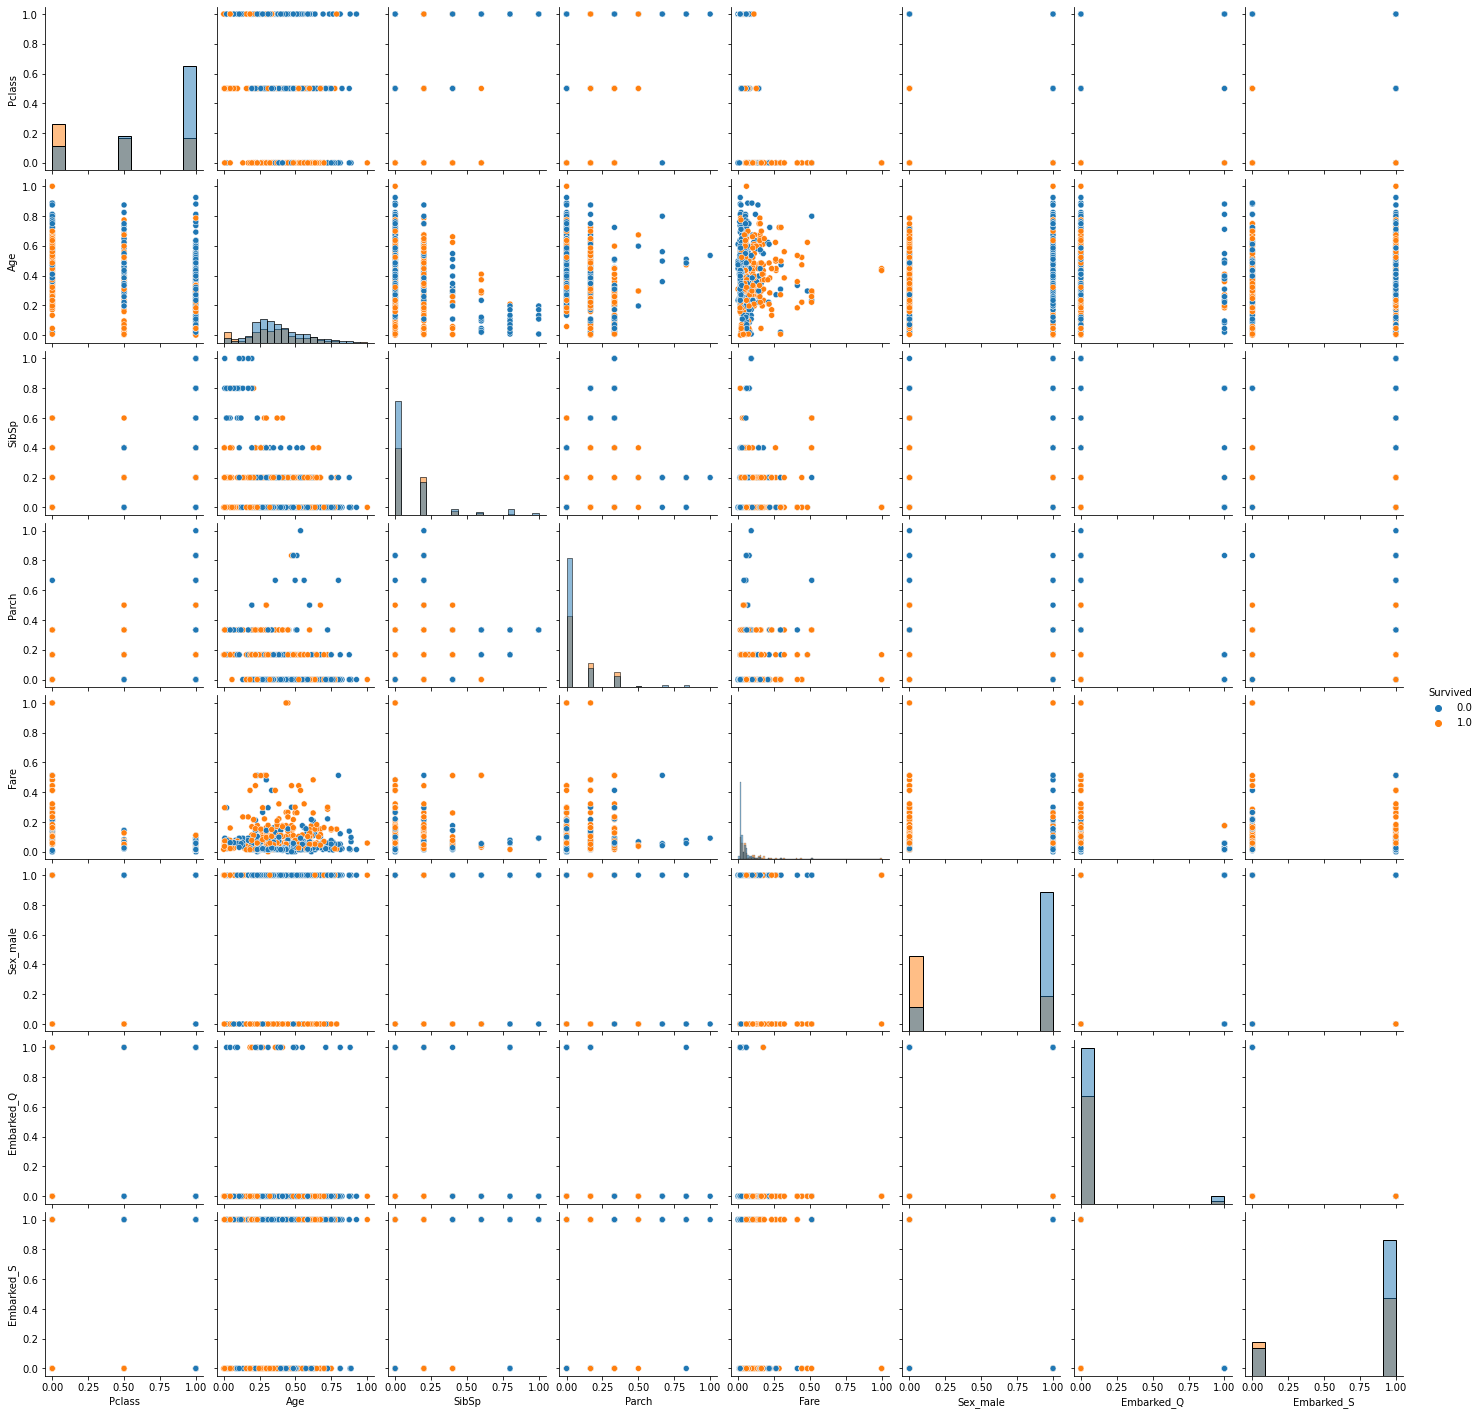

In [17]:
sns.pairplot(new_data,hue='Survived',diag_kind='hist')

In [62]:
X = new_data.drop(['Survived'],axis=1)
y = new_data['Survived']

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=2)

In [22]:
optimizer ={
    'logistic':
               {'model':LogisticRegression(),
                'params':
                        [{
                            'penalty':['l1'],
                            'C':[1.0,2.0,0.1,0.01,3.0],
                            'solver':['liblinear','saga'],
                            'max_iter':[100,200,50,10,'auto']
                        },
                        {
                            'penalty':['l2', 'elasticnet', 'none'],
                            'C':[1.0,2.0,0.1,0.01,3.0],
                            'solver':['newton-cg','lbfgs', 'liblinear', 'sag', 'saga'],
                            'max_iter':[100,200,50,10,'auto']
                        }]},
     'svm':{
             'model':SVC(),
             'params':{
                 'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
                 'C':[1.0,2.0,0.1,0.01,3.0],
                 'gamma':['scale', 'auto'],
                 'max_iter':[100,200,50,10,-1],
                 
                     }
             },
      'Decisiontree':{
          'model':DecisionTreeClassifier(),
          'params':{
              'criterion':['gini', 'entropy'],
              'splitter':['best','random'],
              'max_depth':[10,100,200,20,30]
          }
      }


}
score = []
for model,model_params in optimizer.items():
    gv = GridSearchCV(model_params['model'],param_grid=model_params['params'],cv=5,return_train_score=False)
    gv.fit(x_train,y_train)
    score.append({
        'model': model,
        'best_score': gv.best_score_,
        'best_params': gv.best_params_
    })
    

In [25]:
gv_df = pd.DataFrame(gv.cv_results_)

In [27]:
score

[{'model': 'logistic',
  'best_score': 0.7953125,
  'best_params': {'C': 3.0,
   'max_iter': 10,
   'penalty': 'none',
   'solver': 'sag'}},
 {'model': 'svm',
  'best_score': 0.815625,
  'best_params': {'C': 2.0,
   'gamma': 'scale',
   'kernel': 'poly',
   'max_iter': 200}},
 {'model': 'Decisiontree',
  'best_score': 0.7765625,
  'best_params': {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}}]

In [35]:
lr_model = LogisticRegression(C=3.0,max_iter=10,penalty='none',solver='sag')
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=10,splitter='best')
rf_model = RandomForestClassifier()
svm_model = SVC(C=2.0,gamma='scale',kernel='poly',max_iter=200)
knn_model = KNeighborsClassifier()

In [36]:
lr_model.fit(x_train,y_train)
dt_model.fit(x_train,y_train)
rf_model.fit(x_train,y_train)
svm_model.fit(x_train,y_train)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [37]:
lr_train_score = lr_model.score(x_train,y_train)
dt_train_score = dt_model.score(x_train,y_train)
rf_train_score = rf_model.score(x_train,y_train)
svm_train_score = svm_model.score(x_train,y_train)
knn_train_score = knn_model.score(x_train,y_train)

lr_test_score = lr_model.score(x_test,y_test)
dt_test_score = dt_model.score(x_test,y_test)
rf_test_score = rf_model.score(x_test,y_test)
svm_test_score = svm_model.score(x_test,y_test)
knn_test_score = knn_model.score(x_test,y_test)

In [38]:
d = {
    'model':['logistic','decision','random forest','svm','kneiboures'],
    'train_score':[lr_train_score,dt_train_score,rf_train_score,svm_train_score,knn_train_score],
    'test_score':[lr_test_score,dt_test_score,rf_test_score,svm_test_score,knn_test_score]
}
accuracy_df = pd.DataFrame(data=d)

In [39]:
accuracy_df.sort_values(by='test_score',ascending=False)

,model,train_score,test_score
3,svm,0.834375,0.791667
1,decision,0.926562,0.777778
0,logistic,0.800000,0.763889
2,random forest,0.990625,0.736111
4,kneiboures,0.857812,0.722222


In [60]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
262,0.5,0.447097,0.0,0.000000,0.025374,0.0,0.0,1.0
108,0.0,0.459663,0.2,0.000000,0.103644,1.0,0.0,1.0
556,1.0,0.220910,0.0,0.166667,0.028213,0.0,0.0,0.0
80,1.0,0.459663,0.4,0.000000,0.015469,1.0,0.0,1.0
673,1.0,0.522493,0.0,0.000000,0.014737,1.0,0.0,1.0


In [67]:
new_test = test_data.copy()
new_test.drop(['PassengerId','Ticket','Cabin','Name'],axis=1,inplace=True)
new_test = pd.get_dummies(new_test,drop_first=True)
new_test_scaler = MinMaxScaler()
new_test_scaled = pd.DataFrame(new_test_scaler.fit_transform(new_test),columns=new_test.columns)
si = SimpleImputer(strategy='median').fit_transform(new_test_scaled)
si = pd.DataFrame(si,columns=new_test_scaled.columns)

In [69]:
si.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [70]:
new_prediction = svm_model.predict(si)

In [71]:
sub_df = pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':new_prediction})

In [73]:
file_name = 'Titanic prediction 2.csv'
sub_df.to_csv(file_name,index=False)